<a href="https://colab.research.google.com/github/ImaneFaith/NN-from-scratch-xor/blob/main/EXAM_NN_From_cratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Devoir :  Multi-Layer Network from scratch

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

## Les fonctions d'activation

Definition des fonctions d'activation et leurs dérivées 


In [73]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
  
def relu(x):
  return x * (x > 0) 

def sigmoid_derivative(x):
  return x * (1 - x)

def relu_derivative(x):
  return 1. * (x > 0)


# Classe du Modèle

In [99]:
class MultiLayerNN:
  # constructor
  def __init__(self, input, hidden, output):
    np.random.seed(0)
    self.hidden_weights = np.random.rand(input,hidden)
    self.hidden_bias = np.random.rand(1,hidden)
    self.output_weights = np.random.rand(hidden,output)
    self.output_bias = np.random.rand(1,output)

  def activation_func_determin(self,act_func):
      self.activation_function = act_func
      if act_func == sigmoid:
        act_func_derivative = sigmoid_derivative
        print("using segmoid")
      elif act_func == relu:
       act_func_derivative = relu_derivative
       print("using relu")
      return act_func_derivative
  
  def fit(self, X, y, nbr_iter=1000, learning_rate=0.01, activation_function = sigmoid):
    self.act_func_derivative = self.activation_func_determin(activation_function)
    y_real = y
    y = y.reshape(-1,1)
    affichage = (nbr_iter/20)
    for i in range(nbr_iter):
      hidden_layer_sum = np.dot(X,self.hidden_weights) + self.hidden_bias
      hidden_layer_out = self.activation_function(hidden_layer_sum)
      output_layer_sum = np.dot(hidden_layer_out,self.output_weights) + self.output_bias
      predicted_y = self.activation_function(output_layer_sum)

      dloss_dbias_out=(predicted_y-y)* self.act_func_derivative(predicted_y)
      dloss_dw_out=hidden_layer_out.T.dot(dloss_dbias_out)

      dloss_dbias_h=(dloss_dbias_out).dot(self.output_weights.T)*self.act_func_derivative(hidden_layer_out)
      dloss_dw_h = X.T.dot(dloss_dbias_h)

      self.hidden_weights-=dloss_dw_h*learning_rate
      self.hidden_bias-=np.sum(dloss_dbias_h,axis=0,keepdims=True)*learning_rate
      
      self.output_weights-=dloss_dw_out*learning_rate
      self.output_bias-=np.sum(dloss_dbias_out,axis=0,keepdims=True)*learning_rate

      if (i % affichage == 0) :
        print("iteration ({}) -> loss : {:.4f} | accuracy : {:.4f} ".format(i,np.mean((predicted_y-y_real)**2), (y_real == self.predict(X)).mean() ))
    
  def predict(self, X):
    hidden_layer_sum = np.dot(X,self.hidden_weights) 
    hidden_layer_sum += self.hidden_bias
    hidden_layer_out = self.activation_function(hidden_layer_sum)
    output_layer_sum = np.dot(hidden_layer_out,self.output_weights) + self.output_bias
    predicted_y = self.activation_function(output_layer_sum)
    return np.round(predicted_y).reshape(1,-1)[0]

## Dataset

In [75]:
rng = np.random.RandomState(0)
X = rng.randn(400, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),dtype=int)

# Affichage des données

In [68]:
X[0:12]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502]])

In [70]:
y[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

# Model Creation

Le constructeur reçoit trois paramètres :
1.  Input  : le nombre des neurones de la premiere couche
2.  Hidden : le nombre des neurones de la deuxième couche
3.  Output : le nombre des neurones de la troisième couche


### Apprentissage avec Sigmoid (nombre des iteration = 100000 et learning rate = 0.01)


Dans l'exemple ci-dessous, j'ai crée un réseau de neurones  composé de :
    
---
1.  Input Layer  :  2 neurone
2.  Hidden Layer :  6 neurones 
3.  Output Layer :  1 neurone












     
     

using segmoid
iteration (0) -> loss : 0.4579 | accuracy : 0.4700 
iteration (5000) -> loss : 0.4291 | accuracy : 0.9750 
iteration (10000) -> loss : 0.4450 | accuracy : 0.9850 
iteration (15000) -> loss : 0.4520 | accuracy : 0.9900 
iteration (20000) -> loss : 0.4565 | accuracy : 0.9925 
iteration (25000) -> loss : 0.4597 | accuracy : 0.9925 
iteration (30000) -> loss : 0.4621 | accuracy : 0.9950 
iteration (35000) -> loss : 0.4641 | accuracy : 0.9950 
iteration (40000) -> loss : 0.4657 | accuracy : 0.9950 
iteration (45000) -> loss : 0.4671 | accuracy : 0.9950 
iteration (50000) -> loss : 0.4682 | accuracy : 0.9950 
iteration (55000) -> loss : 0.4693 | accuracy : 0.9950 
iteration (60000) -> loss : 0.4702 | accuracy : 0.9950 
iteration (65000) -> loss : 0.4710 | accuracy : 0.9950 
iteration (70000) -> loss : 0.4717 | accuracy : 0.9950 
iteration (75000) -> loss : 0.4724 | accuracy : 0.9950 
iteration (80000) -> loss : 0.4730 | accuracy : 0.9950 
iteration (85000) -> loss : 0.4735 | ac

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


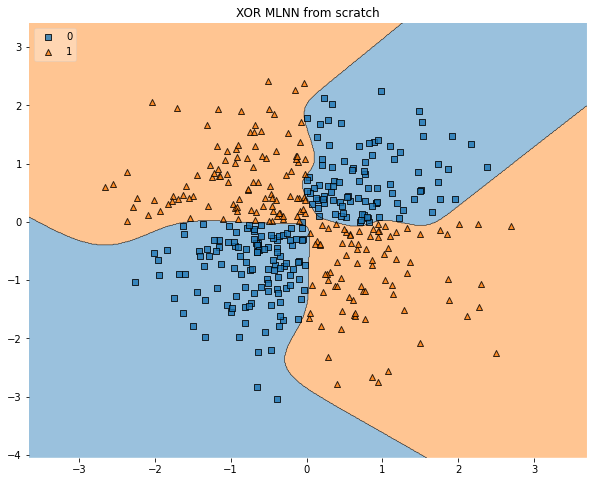

In [102]:
model = MultiLayerNN(2,6,1)
model.fit(X, y, nbr_iter=100000, learning_rate=0.01, activation_function=sigmoid)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()

### Apprentissage avec Relu (nombre des iterations = 200000 et learning rate = 0.0001)

Dans l'exemple ci-dessous, j'ai crée un réseau de neurones  composé de :
    
---
1.  Input Layer  :  2 neurone
2.  Hidden Layer :  6 neurones 
3.  Output Layer :  1 neurone


using relu
iteration (0) -> loss : 14.4699 | accuracy : 0.3975 
iteration (10000) -> loss : 0.4345 | accuracy : 0.9650 
iteration (20000) -> loss : 0.4507 | accuracy : 0.9800 
iteration (30000) -> loss : 0.4597 | accuracy : 0.9775 
iteration (40000) -> loss : 0.4649 | accuracy : 0.9825 
iteration (50000) -> loss : 0.4684 | accuracy : 0.9850 
iteration (60000) -> loss : 0.4704 | accuracy : 0.9850 
iteration (70000) -> loss : 0.4723 | accuracy : 0.9850 
iteration (80000) -> loss : 0.4741 | accuracy : 0.9850 
iteration (90000) -> loss : 0.4756 | accuracy : 0.9875 
iteration (100000) -> loss : 0.4771 | accuracy : 0.9900 
iteration (110000) -> loss : 0.4784 | accuracy : 0.9900 
iteration (120000) -> loss : 0.4793 | accuracy : 0.9950 
iteration (130000) -> loss : 0.4803 | accuracy : 0.9950 
iteration (140000) -> loss : 0.4811 | accuracy : 0.9950 
iteration (150000) -> loss : 0.4819 | accuracy : 0.9950 
iteration (160000) -> loss : 0.4825 | accuracy : 0.9950 
iteration (170000) -> loss : 0.48

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


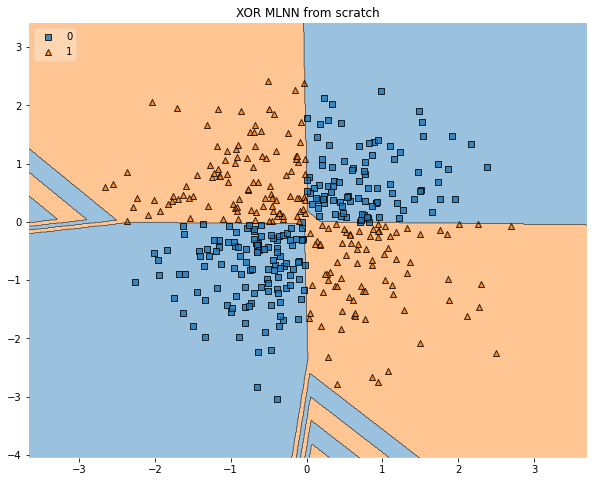

In [103]:
model = MultiLayerNN(2,6,1)
model.fit(X, y, nbr_iter=200000, learning_rate=0.0001, activation_function=relu)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()